In [2]:
import numpy as np
import requests
import pandas as pd
import json
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
sns.set_style("whitegrid")
sns.set_context("poster")
#read in df
ppdf=pd.read_pickle('ready_for_stats.pkl')
sns.set()

In [3]:
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates


In [4]:
def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""


    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(np.concatenate((data1, data2)))

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2
    

In [5]:
def cdf(data):
    #Makes CDF from one array/Series
    # Number of data points: n
    n = float(len(data))
    print(n)
    # x-data for the ECDF: x
    x = np.sort(data)
    print(x)
    # y-data for the ECDF: y
    y = np.arange(1, n+1)/n 
    print(y)
    return x, y


In [6]:
ppdf.loc[:,'team_home':'precipitation']

,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,results,results-spread,favorite_cover,over_under_line,total,over_diff,over_cover,weather_temperature,weather_wind_mph,stadium,coordinates,zipcode,weather_detail,precipitation
4450,BUF,13.0,10.0,MIN,MIN,-2.5,3.0,5.5,False,44.0,23.0,21.0,False,68.0,11.0,Ralph Wilson Stadium,"(42.7738, -78.787)",14127,NaN,0.49
4451,CHI,34.0,7.0,MIA,CHI,-3.5,-27.0,-23.5,True,46.0,41.0,5.0,False,66.0,16.0,Soldier Field,"(41.8623, -87.6167)",60605,NaN,0.00
4452,CIN,21.0,14.0,ARI,CIN,-5.5,-7.0,-1.5,True,47.0,35.0,12.0,False,68.0,10.0,Cinergy Field,"(39.095, -84.516)",45202,NaN,2.48
4453,DEN,14.0,21.0,SEA,DEN,-4.0,7.0,11.0,False,46.0,35.0,11.0,False,62.0,9.0,Mile High Stadium,"(39.7438, -105.02)",80204,NaN,0.00
4454,DET,31.0,17.0,ATL,DET,-4.0,-14.0,-10.0,True,43.0,48.0,-5.0,True,72.0,0.0,Pontiac Silverdome,"(42.34, -83.0455)",48226,DOME,0.00
4455,GB,7.0,34.0,LAR,LAR,-3.0,-27.0,-24.0,True,43.0,41.0,2.0,False,62.0,15.0,Lambeau Field,"(44.5013, -88.0622)",54304,NaN,1.32
4456,IND,14.0,17.0,TEN,IND,-3.0,3.0,6.0,False,41.0,31.0,10.0,False,72.0,0.0,RCA Dome,"(39.7636, -86.1633)",46225,DOME,0.00
4457,KC,3.0,6.0,CLE,CLE,-3.5,-3.0,0.5,False,42.0,9.0,33.0,False,65.0,13.0,Arrowhead Stadium,"(39.0489, -94.4839)",64129,NaN,0.00
4458,OAK,24.0,13.0,LAC,OAK,-6.0,-11.0,-5.0,True,41.0,37.0,4.0,False,82.0,8.0,Los Angeles Memorial Coliseum,"(34.0141, -118.2877)",90037,NaN,0.00
4459,NE,28.0,3.0,NYJ,NE,-6.0,-25.0,-19.0,True,45.0,31.0,14.0,False,63.0,14.0,Foxboro Stadium,"(42.0909, -71.2643)",02035,NaN,0.00


In [36]:
np.percentile(ppdf.precipitation,(5,90))

array([0.  , 0.11])

7375.0
[-68.5 -54.5 -51.  ...  38.   39.   39.5]
[1.35593220e-04 2.71186441e-04 4.06779661e-04 ... 9.99728814e-01
 9.99864407e-01 1.00000000e+00]
7375.0
[-56.73686158 -50.20158195 -47.38646166 ...  42.80307606  46.9785917
  47.73703125]
[1.35593220e-04 2.71186441e-04 4.06779661e-04 ... 9.99728814e-01
 9.99864407e-01 1.00000000e+00]


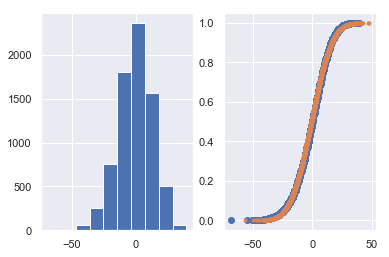

In [8]:
#Plot hist and cdfs for over_diff and spread-results so we can ensure the distributions are normal
plt.subplot(121)
plt.hist(ppdf.over_diff)
plt.subplot(122)
x,y= cdf(ppdf.over_diff)
plt.plot(x,y, linestyle= 'none', marker='o')
normalx , normaly= cdf(np.random.normal(ppdf.over_diff.mean(), size=len(ppdf.over_diff),
                                        scale=ppdf.over_diff.std()))
plt.plot(normalx, normaly, linestyle= 'none', marker='.')
plt.show()

7375.0
[-50.5 -50.  -48.  ...  45.   46.   52. ]
[1.35593220e-04 2.71186441e-04 4.06779661e-04 ... 9.99728814e-01
 9.99864407e-01 1.00000000e+00]
7375.0
[-44.06624127 -43.42118968 -42.54060244 ...  46.75912555  48.25123615
  50.34024465]
[1.35593220e-04 2.71186441e-04 4.06779661e-04 ... 9.99728814e-01
 9.99864407e-01 1.00000000e+00]


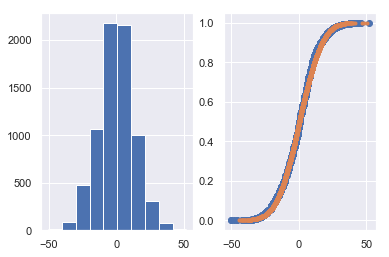

In [9]:
plt.subplot(121)
plt.hist(ppdf['results-spread'])
plt.subplot(122)
x,y= cdf(ppdf['results-spread'])
plt.plot(x,y, linestyle= 'none', marker='o')
normalx , normaly= cdf(np.random.normal(ppdf['results-spread'].mean(), size=len(ppdf['results-spread']),
                       scale= ppdf['results-spread'].std()))
plt.plot(normalx, normaly, linestyle= 'none', marker='.')
plt.show()

Both distibutions appear to be very normal. One thing I have comtemplated is wheather of not there is a correlation between the over_diff and spread minus result. That is to say, if a linesetter makes a large mistake with the spread is s/he more likely to get the O/U far off as well. The analysis showed that spreads and O/U varied week to week with O/U being more consistent, but could there be a correlation on a point to point basis? The absolute values will be more useful here because a spread that was 5 points to low is the same error as an O/U that is 5 points too high.


('Correlation between over_diffabs and resultmSpreadabs:', -0.0954440534784471)


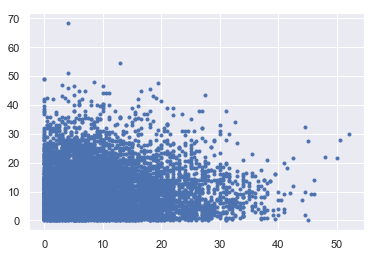

In [10]:
plt.plot(ppdf.resultmSpreadabs, ppdf.over_diffabs, linestyle='none', marker='.')
print("Correlation between over_diffabs and resultmSpreadabs:", np.corrcoef(ppdf.resultmSpreadabs, ppdf.over_diff)[1][0])
plt.show()

It appears there is but the weakest of correlations. This is not absurd because it is reasonanble to guess  different factors could be affected differently by the same weather. Maybe some games that are kept lower scoring by bad weather result in a close game that is not to different than the result predicted in the spread. The reason for lack of correlation here is not as interesting as discerning who weather affects most. This illuminates two interesting questions. (1) Is a group benefitted by the weather? Favorites? Underdogs? Unders? Overs? (2) How does each type of weather condition affect results-spread and over_diff? 

In [11]:
#Lets start with (1) 
#First we will seperate the data into nice and bad weather so that we can find a difference
#
bw= ppdf[ppdf.bw==True]
nw= ppdf[ppdf.bw==False]
print("In bad weather the mean difference between the result and the spread is: {}".format(bw['results-spread'].mean()))
print("In nice weather the mean difference between the result and the spread is: {}".format(nw['results-spread'].mean()))
print("In bad weather the mean difference between the result and the O/U is: {}".format(bw['over_diff'].mean()))
print("In nice weather the mean difference between the result and the O/U is: {}".format(nw['over_diff'].mean()))


In bad weather the mean difference between the result and the spread is: -0.487611496531
In nice weather the mean difference between the result and the spread is: 0.0960571787622
In bad weather the mean difference between the result and the O/U is: 0.401387512389
In nice weather the mean difference between the result and the O/U is: -0.898413446434


It appears that bad weather tends to favor overs and favorites. This is surprising but we should make sure these results are not simply due to randomness

We will use permutation sampling to show wheather the bad weather and nice weather data have similar probability distributions. If they do then we can assume the differences in spread are due to randomness and therefore a little less interesting. We wil us the difference of the means as our test statistic. So our h0 is that the the over_diff and the results-spread are distributed evenly in bad weather and good weather, meaning the test stat should be distributed around 0. H1 then is that they are distributed around their means.

In [12]:
bwover_diff= np.array(bw.over_diff)
nwover_diff= np.array(nw.over_diff)
obsover=bwover_diff.mean()-nwover_diff.mean()
bwresults= np.array(bw['results-spread'])
nwresults= np.array(nw['results-spread'])
obsresults=bwresults.mean()-nwresults.mean()
print('The observed difference in nice weather and bad weather in terms of spread results: {} and over_diff: {}'.format(obsresults,obsover))

The observed difference in nice weather and bad weather in terms of spread results: -0.583668675293 and over_diff: 1.29980095882


In [19]:
sampleover_diff= np.empty(10000)
sampleresult_diff= np.empty(10000)
for i in range(0,10000):
    perm_sampover_diff1, perm_sampover_diff2=permutation_sample(bwover_diff,nwover_diff)
    perm_sampresult1, perm_sampresult2=permutation_sample(bwresults,nwresults)
    sampleover_diff[i]= perm_sampover_diff1.mean()-perm_sampover_diff2.mean()
    sampleresult_diff[i]= perm_sampresult1.mean()-perm_sampresult2.mean()
    

In [26]:
x= abs(sampleresult_diff)>abs(obsresults)
pvalresults=float(x.sum())/len(sampleresult_diff)
y= abs(sampleover_diff)>abs(obsover)
pvalover= float(y.sum())/len(sampleover_diff)
print('The pvalue for results: {} and for O/U: {}'.format(pvalresults,pvalover))

The pvalue for results: 0.189 and for O/U: 0.0049


It appears the effect on the spread result was statistically insignificant so we accept the null. Conversely, The over_diff proved to be significant at a 0.5% level. This means that the difference between the mean over_diff of the nice weather and bad weather games is due to the weather and not randomness. This results are practically significant as well because being one point off could be a lot of money for a casino. While it is somewhat surprising to see divergent results from our two variables it is not totally unexpected. As previously stated, different factors in the weather may affect aspects of the game differently.

In [41]:
wind = ppdf.weather_wind_mph>14
prec= ppdf.precipitation>1.5
temp= ppdf.weather_temperature<32


372